In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import time
import random
import numpy as np
import pandas as pd

%matplotlib inline

# https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python
# https://res.cloudinary.com/dyd911kmh/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf

In [2]:
#plt.style.use('Solarize_Light2')

In [3]:
np.random.seed(1)
rows,cols = 10,1
data = np.random.rand(rows,cols) # You can use other random functions to generate values with constraints
tidx = pd.date_range('2019-01-01', periods=rows, freq='MS') # freq='MS'set the frequency of date in months and start from day 1. You can use 'T' for minutes and so on
df2 = pd.DataFrame(data, columns=['y'], index=tidx)
df2['y'] =  round(df2['y'] * 1000)
df2['counter'] =  df2.apply(lambda x: random.randint(0,9) + 1, axis=1)  # random integer
#df2['unixtime'] =  df.apply(lambda x: (time.mktime(x['ds'].timetuple())), axis=1)  
#df2.drop(columns=['new_columb'])
#df2['counter'] = df2.index.values
#df2['pred'] =  df2.apply(lambda x: 1, axis=1)  
#df2 = df2.rename(columns={'index': 'ds'}, inplace=True)
#df2 = df2.rename({'index': 'ds'},  axis='columns')
#df2 = df2.rename(columns={"index":"ds"})
df2.index.names = ['ds']
df2['col_idx'] = range(1, len(df2) + 1)
#df2.reset_index()
#df2 = df2.reset_index(drop=True)
print(df2.head()[:3])

                y  counter  col_idx
ds                                 
2019-01-01  417.0        7        1
2019-02-01  720.0        2        2
2019-03-01    0.0        6        3


In [4]:
#df2.rename(columns = {list(df2)[0]: 'col_1_new_name'}, inplace = True)
#df2 = df2.rename(columns={"index":"ds"})
#df2.rename(columns = {'index':'ds'}, inplace = True)
#print(df2.head()[:3])

In [5]:
print(df2.head()[:3])

                y  counter  col_idx
ds                                 
2019-01-01  417.0        7        1
2019-02-01  720.0        2        2
2019-03-01    0.0        6        3


In [6]:
#df2.describe()

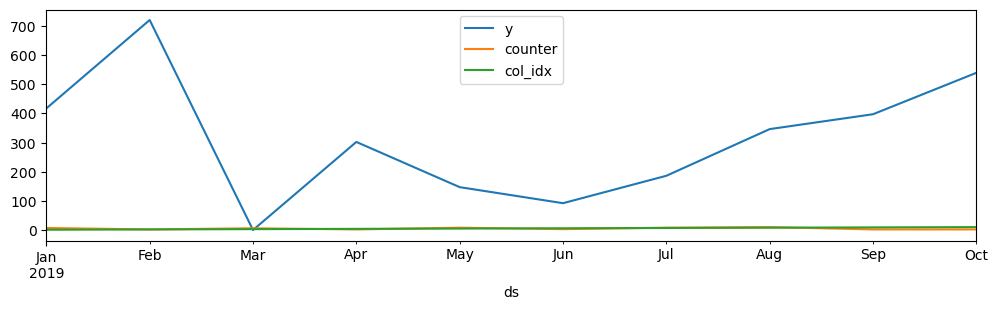

In [7]:
df2.plot(figsize=(12,3));

In [8]:
#r = requests.get('https://datamarket.com/api/v1/list.json?ds=22ox')
#jobj = json.loads(r.text[18:-1])
#data = jobj[0]['data']
#df = pd.DataFrame(data, columns=['time','data']).set_index('time')

In [9]:
print(df2.iloc[:, 0].values)
print(df2.iloc[:, 1].values)
print(df2.iloc[:, 2].values)
#print(df2.iloc[:, 3].values)

[417. 720.   0. 302. 147.  92. 186. 346. 397. 539.]
[ 7  2  6  2  8  3  8 10  2  2]
[ 1  2  3  4  5  6  7  8  9 10]


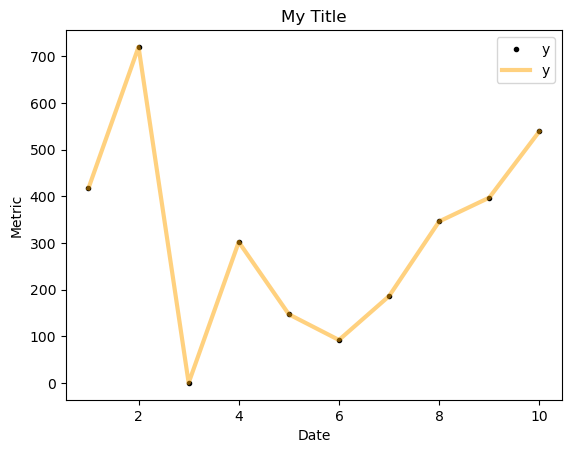

In [10]:

from sklearn.linear_model import LinearRegression
X = df2.iloc[:, 0].values.astype(float).reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df2.iloc[:, 2].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

df2['pred'] = Y_pred
ax = df2.plot(x='col_idx', y='y', color='black', style='.')
df2.plot(x='col_idx', y='y', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('My Title')
ax.set_xlabel('Date')
ax.set_ylabel('Metric')
plt.show()

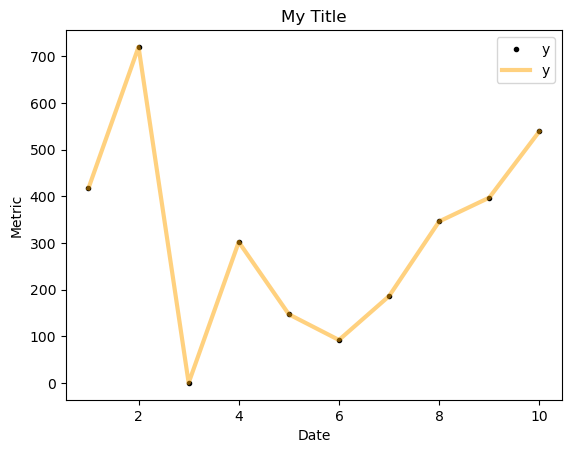

In [11]:

import numpy as np
from sklearn import datasets, linear_model

X_train = X[:-6]
y_train = Y[:-6]

X_test = X[-6:]
y_test = Y[-6:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


df2['pred'] = Y_pred
ax = df2.plot(x='col_idx', y='y', color='black', style='.')
df2.plot(x='col_idx', y='y', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('My Title')
ax.set_xlabel('Date')
ax.set_ylabel('Metric')
plt.show()